In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

In [74]:
# adj_cases = (total_cases / adjpop) * 100000
raw_data = pd.read_csv("../data/csvs/data.v1.1.csv")

In [77]:
raw_data.head()

,id,pop,logpop,nbHF,adjpop,longitude,latitude,sampling,total_cases,adj_cases,Waccess,access,elevation,aridity,irrigation,lst,pet,pop.1,urban
0,1,9087377.00,16.022397,1,9087377.00,114.291939,30.567514,1,2639.0,29.040283,-4.396702,-2.685036,-1.767525,1.043890,-0.404735,-1.308296,-0.033009,3.327757,2.880330
1,2,10514420.00,16.168258,1,10514420.00,114.129100,22.653890,1,140.0,1.331505,-1.013740,-1.744176,-1.470888,2.265500,1.000357,-0.562087,0.482712,2.969388,2.730638
2,3,22972066.00,16.949790,1,22972066.00,121.455500,31.204500,1,121.0,0.526727,-1.423063,-2.456093,-2.095271,0.756405,0.579926,-0.873084,0.194353,3.991484,3.653661
3,4,2904529.50,14.881782,1,2904529.50,110.165400,21.100030,1,9.0,0.309861,-0.764324,-2.039705,-1.917716,1.191654,0.862389,-0.145458,1.005834,1.906079,1.568910
4,5,1011995.25,13.827435,1,1011995.25,102.873900,25.392360,1,23.0,2.272738,-0.246663,-0.485263,0.557912,0.747362,-0.404735,0.012917,-0.262118,0.840807,1.027507


In [18]:
sample_data = raw_data.drop(raw_data[raw_data.sampling == 0].index).dropna()

In [19]:
sample_data.isna().any()

id             False
pop            False
logpop         False
nbHF           False
adjpop         False
longitude      False
latitude       False
sampling       False
total_cases    False
adj_cases      False
Waccess        False
access         False
elevation      False
aridity        False
irrigation     False
lst            False
pet            False
pop.1          False
urban          False
dtype: bool

In [20]:
sample_data.head()

,id,pop,logpop,nbHF,adjpop,longitude,latitude,sampling,total_cases,adj_cases,Waccess,access,elevation,aridity,irrigation,lst,pet,pop.1,urban
0,1,9087377.00,16.022397,1,9087377.00,114.291939,30.567514,1,2639.0,29.040283,-4.396702,-2.685036,-1.767525,1.043890,-0.404735,-1.308296,-0.033009,3.327757,2.880330
1,2,10514420.00,16.168258,1,10514420.00,114.129100,22.653890,1,140.0,1.331505,-1.013740,-1.744176,-1.470888,2.265500,1.000357,-0.562087,0.482712,2.969388,2.730638
2,3,22972066.00,16.949790,1,22972066.00,121.455500,31.204500,1,121.0,0.526727,-1.423063,-2.456093,-2.095271,0.756405,0.579926,-0.873084,0.194353,3.991484,3.653661
3,4,2904529.50,14.881782,1,2904529.50,110.165400,21.100030,1,9.0,0.309861,-0.764324,-2.039705,-1.917716,1.191654,0.862389,-0.145458,1.005834,1.906079,1.568910
4,5,1011995.25,13.827435,1,1011995.25,102.873900,25.392360,1,23.0,2.272738,-0.246663,-0.485263,0.557912,0.747362,-0.404735,0.012917,-0.262118,0.840807,1.027507


In [21]:
sample_data["total_cases"].describe()

count    1368.000000
mean        6.150585
std        74.538095
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      2639.000000
Name: total_cases, dtype: float64

In [22]:
total_cases_without_zero = sample_data.drop(sample_data[sample_data.total_cases == 0].index)["total_cases"]

In [23]:
total_cases_without_zero.describe()

count     392.000000
mean       21.464286
std       138.184275
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max      2639.000000
Name: total_cases, dtype: float64

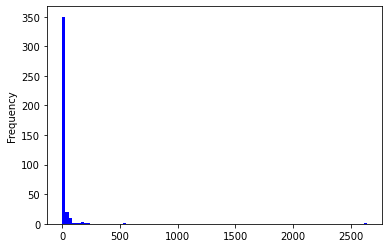

In [24]:
total_cases_without_zero.plot.hist(bins=100, color="blue")

In [25]:
adjusted_cases_without_zero = sample_data.drop(sample_data[sample_data.adj_cases == 0].index)["adj_cases"]

In [27]:
adjusted_cases_without_zero.describe()

count    392.000000
mean       1.100348
std        3.487996
min        0.014295
25%        0.158160
50%        0.361438
75%        0.809970
max       53.239361
Name: adj_cases, dtype: float64

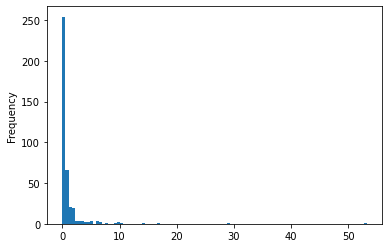

In [28]:
adjusted_cases_without_zero.plot.hist(bins=100)

(array([ 1.,  6., 25., 47., 55., 76., 67., 49., 30., 12., 10.,  9.,  3.,
         1.,  1.]),
 array([-4.24786104, -3.69968377, -3.1515065 , -2.60332924, -2.05515197,
        -1.5069747 , -0.95879743, -0.41062016,  0.13755711,  0.68573438,
         1.23391164,  1.78208891,  2.33026618,  2.87844345,  3.42662072,
         3.97479799]),
 <a list of 15 Patch objects>)

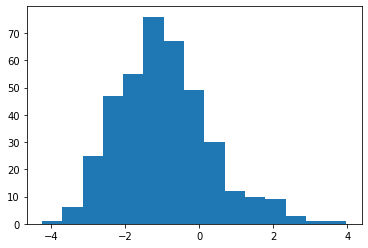

In [29]:
# Logarithmic transformation of adjusted_cases_without_zero
# it looks more like normal distribution
plt.hist(np.log(adjusted_cases_without_zero), bins=15)

In [30]:
scaler = MinMaxScaler()
adjusted_cases_scaled = scaler.fit_transform(sample_data[["adj_cases"]])

In [31]:
print("Min :", adjusted_cases_scaled.min())
print("Mean:", adjusted_cases_scaled.mean())
print("1st Quantile:", np.quantile(adjusted_cases_scaled, 0.25))
print("Median:", np.median(adjusted_cases_scaled))
print("3rd Quantile:", np.quantile(adjusted_cases_scaled, 0.75))
print("Max:", adjusted_cases_scaled.max())

Min : 0.0
Mean: 0.0059223927970386845
1st Quantile: 0.0
Median: 0.0
3rd Quantile: 0.001859561858009653
Max: 1.0


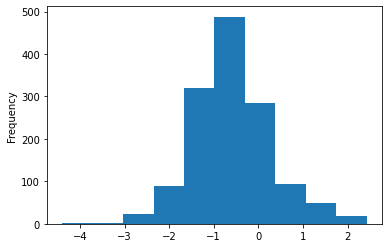

In [32]:
sample_data["Waccess"].plot.hist()

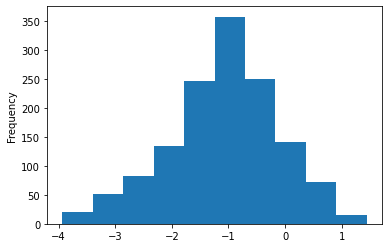

In [33]:
sample_data["access"].plot.hist()

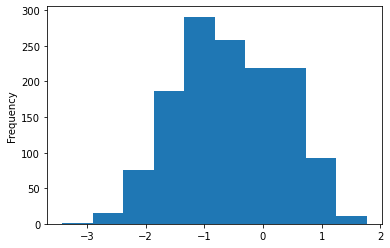

In [34]:
sample_data["elevation"].plot.hist()

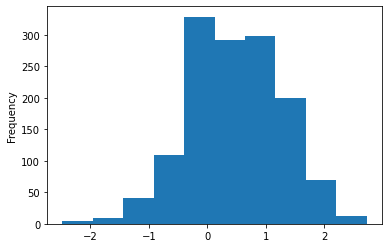

In [36]:
sample_data["aridity"].plot.hist()

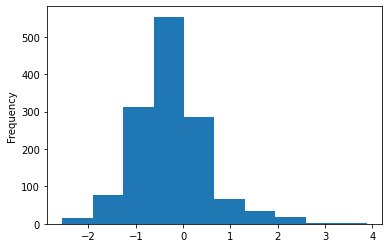

In [37]:
sample_data["lst"].plot.hist()

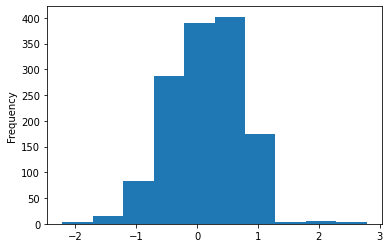

In [38]:
sample_data["pet"].plot.hist()

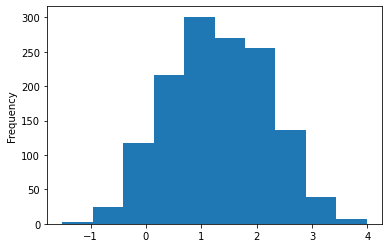

In [39]:
sample_data["pop.1"].plot.hist()

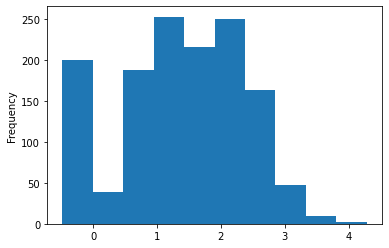

In [40]:
sample_data["urban"].plot.hist()

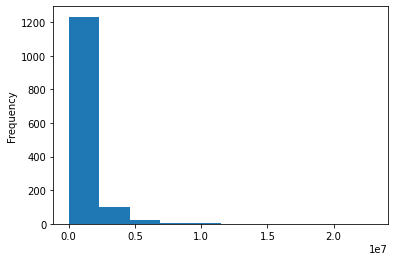

In [41]:
# "adjpop" column is the same as "pop" column
sample_data["adjpop"].plot.hist()

In [42]:
sample_data.groupby("nbHF")["id"].nunique()

nbHF
1    1356
2       7
Name: id, dtype: int64